### Fraud Detection Data Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
fraud_det = pd.read_csv(r'C:\Users\karthikp\Downloads\Inceptors\Preprocessing files\fraud-detection.csv')
fraud_det[:5]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
fraud_det.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [5]:
fraud_det.count()

step              100165
type              100165
amount            100165
nameOrig          100165
oldbalanceOrg     100165
newbalanceOrig    100165
nameDest          100165
oldbalanceDest    100165
newbalanceDest    100165
isFraud           100165
dtype: int64

In [6]:
fraud_det.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,100165.000000,1.001650e+05,1.001650e+05,1.001650e+05,1.001650e+05,1.001650e+05,100165.000000
mean,8.502112,1.736458e+05,8.801756e+05,8.965348e+05,8.810839e+05,1.184639e+06,0.001158
std,1.825055,3.442910e+05,2.676095e+06,2.714232e+06,2.402387e+06,2.802252e+06,0.034011
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,9.970160e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,5.285289e+04,2.008500e+04,0.000000e+00,2.091500e+04,5.048120e+04,0.000000
75%,10.000000,2.119434e+05,1.910560e+05,2.154246e+05,5.891912e+05,1.061043e+06,0.000000
max,10.000000,1.000000e+07,3.380000e+07,3.400000e+07,3.400000e+07,3.890000e+07,1.000000


In [7]:
fraud_det.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
fraud_det.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [9]:
type1 = fraud_det['type'].value_counts()
type2 = pd.DataFrame(type1)
type3 = type2.reset_index()
type3 = type3.rename(columns={'index':'Desc','type':'Count'})
type3

,Desc,Count
0,PAYMENT,39552
1,CASH_OUT,30772
2,CASH_IN,20248
3,TRANSFER,8603
4,DEBIT,990


<AxesSubplot:xlabel='Desc', ylabel='Count'>

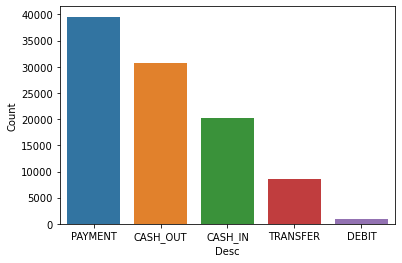

In [10]:
sns.barplot(x = type3.Desc, y = type3.Count)

In [11]:
fraud_det['type']=fraud_det['type'].map({'PAYMENT':1,'CASH_OUT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})
fraud_det

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
100160,10,3,61054.02,C1657461053,11600000.0,11700000.00,C622723232,1054868.85,993814.83,0
100161,10,3,347608.07,C199435243,11700000.0,12000000.00,C1029211742,1814256.11,3246825.50,0
100162,10,3,68846.64,C975194954,12000000.0,12100000.00,C355970563,1622436.37,2287253.07,0
100163,10,3,48078.78,C1122979545,12100000.0,12200000.00,C589884531,410069.03,161779.60,0


In [12]:
fraud_det.dtypes

step                int64
type                int64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [13]:
x = pd.DataFrame(zip(fraud_det.type, fraud_det.amount, fraud_det.oldbalanceOrg     , fraud_det.newbalanceOrig    ),columns=['Payments','Amount','OldBalanceOrg','NewBalanceOrg'])
x

,Payments,Amount,OldBalanceOrg,NewBalanceOrg
0,1,9839.64,170136.0,160296.36
1,1,1864.28,21249.0,19384.72
2,4,181.00,181.0,0.00
3,2,181.00,181.0,0.00
4,1,11668.14,41554.0,29885.86
...,...,...,...,...
100160,3,61054.02,11600000.0,11700000.00
100161,3,347608.07,11700000.0,12000000.00
100162,3,68846.64,12000000.0,12100000.00
100163,3,48078.78,12100000.0,12200000.00


In [54]:
y = fraud_det.iloc[:,-1]
y

0         0
1         0
2         1
3         1
4         0
         ..
100160    0
100161    0
100162    0
100163    0
100164    0
Name: isFraud, Length: 100165, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)

### GaussianNB Modeling

In [19]:
model = GaussianNB()

In [20]:
model.fit(x_train,y_train)

GaussianNB()

In [22]:
y_pred = model.predict(x_test)

In [26]:
acc_score = accuracy_score(y_pred, y_test)

In [27]:
print(acc_score)

0.9797670549084858


In [28]:
confusion_matrix(y_pred, y_test)

array([[29438,    31],
       [  577,     4]], dtype=int64)

In [31]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29469
           1       0.11      0.01      0.01       581

    accuracy                           0.98     30050
   macro avg       0.55      0.50      0.50     30050
weighted avg       0.96      0.98      0.97     30050



### MultinomialNB Modeling

In [35]:
model1 = MultinomialNB()

In [38]:
model1.fit (x_train, y_train)

MultinomialNB()

In [40]:
y1_pred = model1.predict(x_test)

In [42]:
acc_score1 = accuracy_score(y_test,y1_pred)

In [43]:
print(acc_score1)

0.4502495840266223


In [44]:
print('Result of GaussianNB Modeling: ',acc_score)
print('Result of MultinomialNB Modeling: ',acc_score1)
print('In the comparison of Gauss & Multinomail Modelings, GaussianNB modeling seems to give better result')

Result of GaussianNB Modeling:  0.9797670549084858
Result of MultinomialNB Modeling:  0.4502495840266223
In the comparison of Gauss & Multinomail Modelings, GaussianNB modeling seems to give better result


In [52]:
features = np.array([[4, 181, 181, 0.0]])
print(model.predict(features))

[0]
